### Imports

In [1]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns


In [2]:
housing = pd.read_excel("machineLearning_excel_updated.xlsx")
x = housing.drop(['Name'], axis=1)
y= housing['Name']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (736, 4)
x_test : (184, 4)
y_train : (736,)
y_test : (184,)


In [3]:
from sklearn.linear_model import LinearRegression, Lasso

In [4]:
lr = LinearRegression()
lr.fit(x_train,y_train)
#
y_predict = lr.predict(x_test)
y_predict

array([6.04676109, 4.81649871, 5.09693405, 7.15209308, 6.65547431,
       5.41390587, 4.75736599, 4.56919164, 4.21259181, 5.10622146,
       4.59885109, 5.51540096, 5.11964491, 4.48800971, 4.60929175,
       4.70316904, 4.78416366, 4.9614801 , 4.8836964 , 4.78353836,
       5.888248  , 4.33843675, 4.78698339, 5.11557984, 4.74498963,
       4.95340037, 4.48718885, 4.99463224, 4.73818745, 4.96450885,
       4.15390854, 5.16005952, 4.72716497, 4.77156967, 5.14206621,
       5.51872602, 4.89773623, 5.60873091, 5.30757041, 5.1751666 ,
       5.2318306 , 5.02594613, 5.27976115, 5.13867617, 5.07597044,
       5.08957047, 4.27513547, 4.44350945, 5.19422154, 4.67880012,
       5.28045245, 5.30262552, 7.1139804 , 4.55202797, 5.21348456,
       5.56109166, 4.88613635, 5.47676464, 4.93760439, 4.74070817,
       4.83690363, 5.03683083, 5.30340997, 5.20545717, 5.22019709,
       5.30838529, 4.72537958, 4.96166684, 4.72688936, 5.06174465,
       5.30449009, 5.01762207, 5.2098573 , 5.27260479, 5.57794

In [5]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  1.0222510413417114
 root mean squared error:  1.3117843416544888
Coefficient of determination R^2:  0.28159978603564717


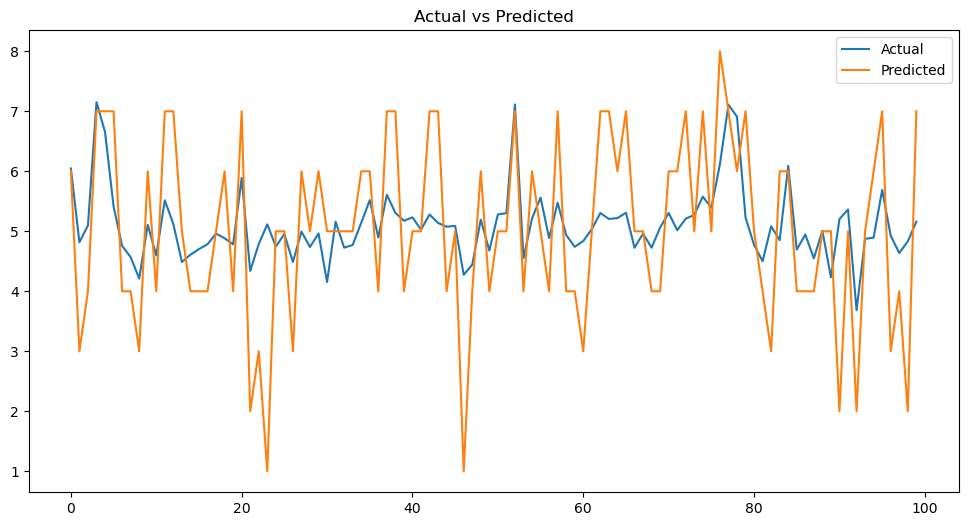

In [6]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error:  0.9836956521739131
Root Mean Squared Error:  1.4688800821211287
Coefficient of determination R^2:  0.09922929897034338


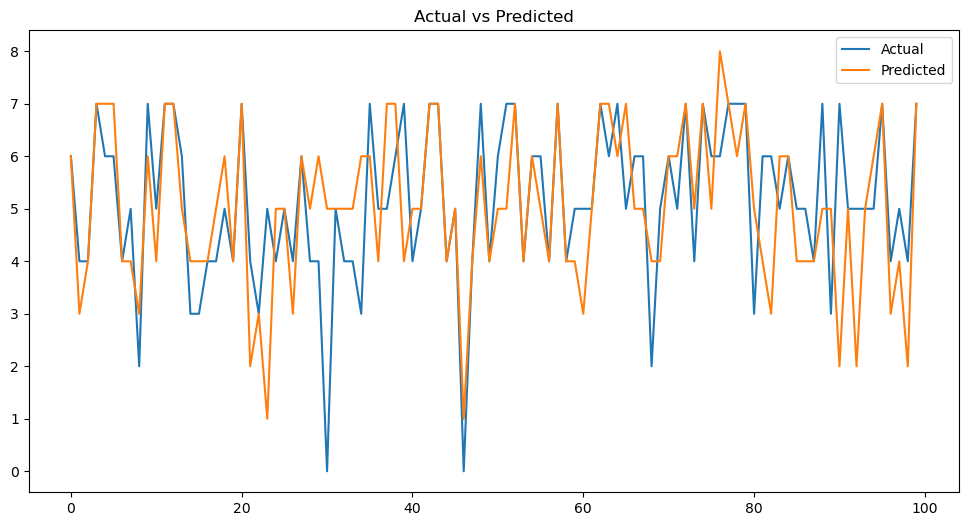

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_predict_dt = dt.predict(x_test)

# Print metrics
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict_dt))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict_dt)))
print('Coefficient of determination R^2: ', r2_score(y_test, y_predict_dt))

# Plot Actual vs Predicted values
fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({'Predicted': y_predict_dt, 'Actual': y_test})
result = result.reset_index()
result = result.drop(['index'], axis=1)
plt.plot(result[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  1.022130561509444
 root mean squared error:  1.3116284818129174
Coefficient of determination R^2:  0.28177048953945893


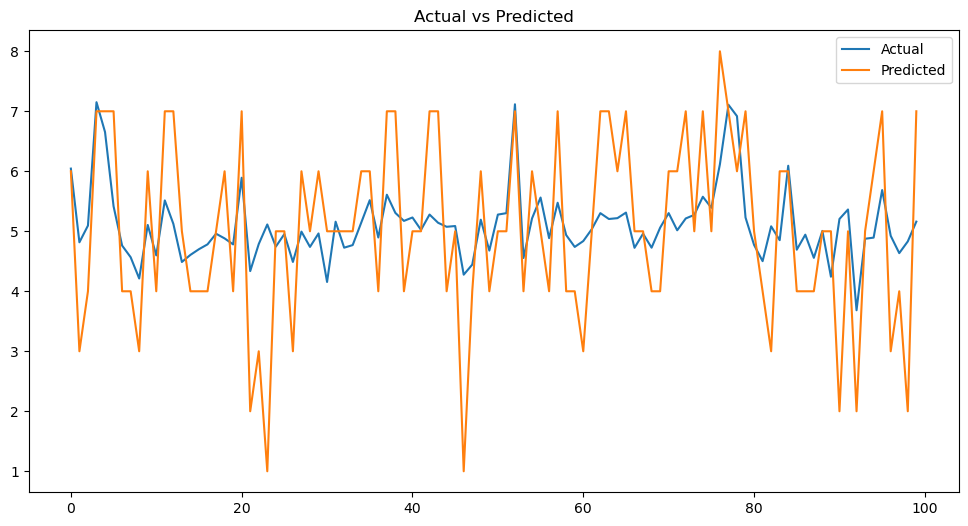

In [8]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  0.8166304347826087
root mean squared error:  1.1335625833780782
Coefficient of determination R^2:  0.46354589555459635


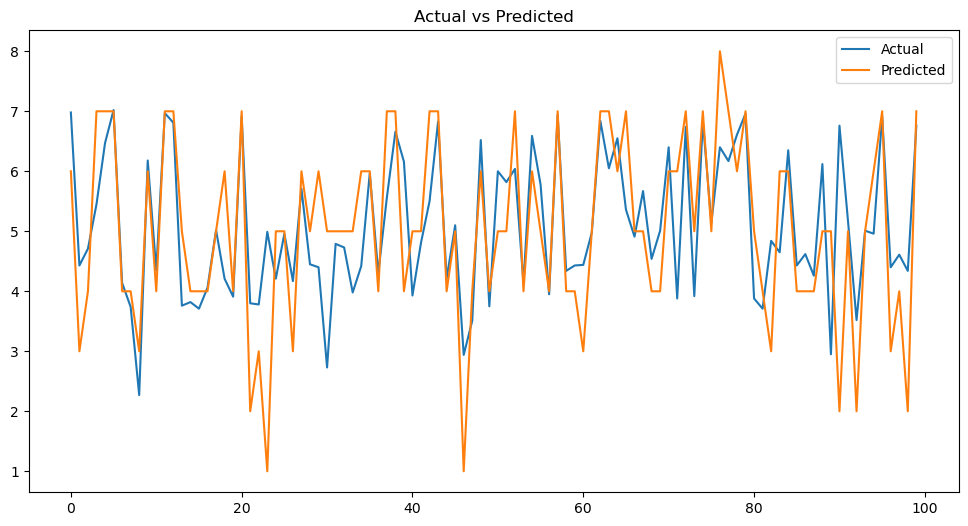

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [10]:
final_RMSE = pd.DataFrame( data  = [[61399.61, 61399.61, 62998.31, 45344.87],
                                    [0.604,0.604,0.583,0.784]],
                          columns  = ['Linear Regression','Lasso','Decision Tree Regressor','Random Forest Regressor'],
                         index =['RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,61399.610000,0.604000
Lasso,61399.610000,0.604000
Decision Tree Regressor,62998.310000,0.583000
Random Forest Regressor,45344.870000,0.784000


In [11]:
params_grid = {
    'n_estimators':[10,20,50],
    'max_leaf_nodes':list(range(0,5))}


grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=3)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\s

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4],
                         'n_estimators': [10, 20, 50]},
             verbose=1)

In [12]:
grid_search.best_params_    # en uygun parametreleri yazdır 

{'max_leaf_nodes': 4, 'n_estimators': 50}

mean absolute error:  0.7859985147944168
root mean squared error:  1.092384234768772
Coefficient of determination R^2:  0.5018129714647188


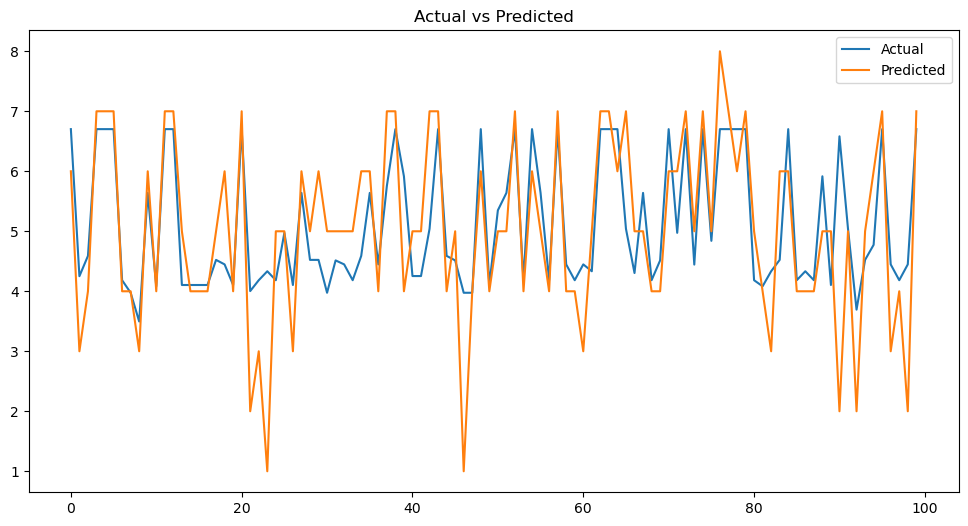

In [13]:
# bulduğumuz parametrelerle test edelim
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_leaf_nodes=4)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()